<a href="https://colab.research.google.com/github/unclepete-20/lab2-sds/blob/main/lab2_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 2 - Deteccion de SPAM**

### Pedro Arriola (20188)
### Oscar Lopez (20679)

#### Parte 1 – Ingeniería de características

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('spam.csv', encoding='latin1')

data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [4]:
data.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

data

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [6]:
import unicodedata
import re

def normalize_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar acentos
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-z\s]', '', text)
    return text

data['message'] = data['message'].apply(normalize_text)

data

,label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the nd time we have tried contact u u...
5568,0,will i b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

data['message'] = data['message'].apply(remove_stopwords)

data

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,nd time tried contact u u pound prize claim ea...
5568,0,b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


In [9]:
contraction_mapping = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'll": "I will",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that'd": "that would",
    "that's": "that is",
    "there'd": "there had",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "y'all": "you all",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

def expand_contractions(text, contraction_mapping):

    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

data['message'] = data['message'].apply(lambda x: expand_contractions(x, contraction_mapping))

data

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,nd time tried contact u u pound prize claim ea...
5568,0,b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


### Caracteristicas adicionales

- `label`: Esta característica indica si un mensaje es clasificado como "ham" (0) o "spam" (1). Es la variable objetivo que el modelo intentará predecir.

- `message`: Esta característica contiene el texto del mensaje SMS pre-procesado. Se utiliza como entrada para el modelo.

- `message_length`: Esta característica representa la longitud del mensaje en términos de número de caracteres. Puede proporcionar información sobre la complejidad o la extensión del mensaje.

- `word_count`: Esta característica cuenta el número de palabras en cada mensaje. Puede ayudar a capturar la complejidad y la longitud del mensaje de una manera más intuitiva que `message_length`.

- `keyword_count`: Esta característica cuenta el número total de ocurrencias de palabras clave específicas en el mensaje. Las palabras clave pueden indicar la presencia de ciertos temas comunes en mensajes de spam, como "free", "urgent", "claim", etc.

- `special_characters_count`: Esta característica cuenta el número total de caracteres especiales (como !, ?, $, %, #, @) en el mensaje. Los mensajes de spam a menudo contienen una mayor cantidad de estos caracteres para llamar la atención del destinatario.

- `has_link`: Esta característica indica si el mensaje contiene un enlace o una URL. La presencia de enlaces en los mensajes puede ser indicativa de spam, especialmente si se utilizan para dirigir a los destinatarios a sitios web maliciosos.

- `has_phone_number`: Esta característica indica si el mensaje contiene un número de teléfono. Los mensajes de spam a menudo incluyen números de teléfono para que los destinatarios los llamen o envíen mensajes, lo que puede ser un indicador de spam.


In [10]:
data['message_length'] = data['message'].apply(len)
data['word_count'] = data['message'].apply(lambda x: len(x.split()))

In [11]:
keyword_frequency = ['free', 'urgent', 'claim', 'offer', 'winner', 'cash', 'prize', 'click', 'unsubscribe']

def count_keywords(text):
    return sum(text.lower().count(keyword) for keyword in keyword_frequency)

data['keyword_count'] = data['message'].apply(count_keywords)

In [12]:
special_characters = ['!', '?', '$', '%', '#', '@']

def count_special_characters(text):
    return sum(text.count(char) for char in special_characters)

data['special_characters_count'] = data['message'].apply(count_special_characters)

In [13]:
data['has_link'] = data['message'].apply(lambda x: 1 if 'http' in x.lower() else 0)

In [14]:
data['has_phone_number'] = data['message'].apply(lambda x: 1 if re.search(r'\d{10}', x) else 0)

In [15]:
# dataset con caracteristicas adicionales
data

,label,message,message_length,word_count,keyword_count,special_characters_count,has_link,has_phone_number
0,0,go jurong point crazy available bugis n great ...,82,16,0,0,0,0
1,0,ok lar joking wif u oni,23,6,0,0,0,0
2,1,free entry wkly comp win fa cup final tkts st ...,107,20,1,0,0,0
3,0,u dun say early hor u c already say,35,9,0,0,0,0
4,0,nah dont think goes usf lives around though,43,8,0,0,0,0
...,...,...,...,...,...,...,...,...
5567,1,nd time tried contact u u pound prize claim ea...,81,15,2,0,0,0
5568,0,b going esplanade fr home,25,5,0,0,0,0
5569,0,pity mood soany suggestions,27,4,0,0,0,0
5570,0,guy bitching acted like id interested buying s...,82,14,1,0,0,0


### Representación de texto

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Crear un objeto CountVectorizer para BoW con ngram_range=(1, 2)
bow_vectorizer = CountVectorizer(ngram_range=(1, 2))

# Ajustar y transformar los mensajes en su representación BoW
X_bow = bow_vectorizer.fit_transform(data['message'])

# Crear un objeto TfidfVectorizer para TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar y transformar los mensajes en su representación TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(data['message'])

# Mostrar algunos ejemplos de los mensajes en su representación numérica (BoW)
print("Ejemplos de mensajes en su representación BoW:")
print(X_bow[:5].toarray())

# Mostrar algunos ejemplos de los mensajes en su representación numérica (TF-IDF)
print("\nEjemplos de mensajes en su representación TF-IDF:")
print(X_tfidf[:5].toarray())

Ejemplos de mensajes en su representación BoW:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Ejemplos de mensajes en su representación TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Parte 2 - Implementación del modelo

#### Separación de datos

In [18]:
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y etiquetas (y)
X = data[['message_length', 'word_count', 'keyword_count', 'special_characters_count', 'has_link', 'has_phone_number']]
y = data['label']

# Dividir los datos en conjuntos de entrenamiento y prueba para BoW y TF-IDF (70% entrenamiento, 30% prueba)
X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(X_bow, y, test_size=0.3, random_state=42)
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Verificar las formas de los conjuntos de datos para BoW y TF-IDF
print("Forma de X_bow_train:", X_bow_train.shape)
print("Forma de X_bow_test:", X_bow_test.shape)
print("Forma de y_bow_train:", y_bow_train.shape)
print("Forma de y_bow_test:", y_bow_test.shape)
print("\nForma de X_tfidf_train:", X_tfidf_train.shape)
print("Forma de X_tfidf_test:", X_tfidf_test.shape)
print("Forma de y_tfidf_train:", y_tfidf_train.shape)
print("Forma de y_tfidf_test:", y_tfidf_test.shape)

Forma de X_bow_train: (3900, 38985)
Forma de X_bow_test: (1672, 38985)
Forma de y_bow_train: (3900,)
Forma de y_bow_test: (1672,)

Forma de X_tfidf_train: (3900, 8449)
Forma de X_tfidf_test: (1672, 8449)
Forma de y_tfidf_train: (3900,)
Forma de y_tfidf_test: (1672,)


### Implementación

In [19]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score

# Definir los modelos de SVM y Random Forest
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # Uso de un kernel lineal para SVM
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar los modelos con BoW
svm_model.fit(X_bow_train, y_bow_train)
rf_model.fit(X_bow_train, y_bow_train)

# Predecir las etiquetas para BoW
y_pred_svm_bow = svm_model.predict(X_bow_test)
y_pred_rf_bow = rf_model.predict(X_bow_test)

# Calcular las métricas para BoW
conf_matrix_svm_bow = confusion_matrix(y_bow_test, y_pred_svm_bow)
precision_svm_bow = precision_score(y_bow_test, y_pred_svm_bow)
recall_svm_bow = recall_score(y_bow_test, y_pred_svm_bow)
fpr_svm_bow, tpr_svm_bow, _ = roc_curve(y_bow_test, y_pred_svm_bow)
auc_svm_bow = roc_auc_score(y_bow_test, y_pred_svm_bow)

conf_matrix_rf_bow = confusion_matrix(y_bow_test, y_pred_rf_bow)
precision_rf_bow = precision_score(y_bow_test, y_pred_rf_bow)
recall_rf_bow = recall_score(y_bow_test, y_pred_rf_bow)
fpr_rf_bow, tpr_rf_bow, _ = roc_curve(y_bow_test, y_pred_rf_bow)
auc_rf_bow = roc_auc_score(y_bow_test, y_pred_rf_bow)

# Entrenar los modelos con TF-IDF
svm_model.fit(X_tfidf_train, y_tfidf_train)
rf_model.fit(X_tfidf_train, y_tfidf_train)

# Predecir las etiquetas para TF-IDF
y_pred_svm_tfidf = svm_model.predict(X_tfidf_test)
y_pred_rf_tfidf = rf_model.predict(X_tfidf_test)

# Calcular las métricas para TF-IDF
conf_matrix_svm_tfidf = confusion_matrix(y_tfidf_test, y_pred_svm_tfidf)
precision_svm_tfidf = precision_score(y_tfidf_test, y_pred_svm_tfidf)
recall_svm_tfidf = recall_score(y_tfidf_test, y_pred_svm_tfidf)
fpr_svm_tfidf, tpr_svm_tfidf, _ = roc_curve(y_tfidf_test, y_pred_svm_tfidf)
auc_svm_tfidf = roc_auc_score(y_tfidf_test, y_pred_svm_tfidf)

conf_matrix_rf_tfidf = confusion_matrix(y_tfidf_test, y_pred_rf_tfidf)
precision_rf_tfidf = precision_score(y_tfidf_test, y_pred_rf_tfidf)
recall_rf_tfidf = recall_score(y_tfidf_test, y_pred_rf_tfidf)
fpr_rf_tfidf, tpr_rf_tfidf, _ = roc_curve(y_tfidf_test, y_pred_rf_tfidf)
auc_rf_tfidf = roc_auc_score(y_tfidf_test, y_pred_rf_tfidf)

# Imprimir los resultados
print("Métricas para SVM con BoW:")
print("Matriz de Confusión:\n", conf_matrix_svm_bow)
print("Precision:", precision_svm_bow)
print("Recall:", recall_svm_bow)
print("AUC:", auc_svm_bow)

print("\nMétricas para Random Forest con BoW:")
print("Matriz de Confusión:\n", conf_matrix_rf_bow)
print("Precision:", precision_rf_bow)
print("Recall:", recall_rf_bow)
print("AUC:", auc_rf_bow)

print("\nMétricas para SVM con TF-IDF:")
print("Matriz de Confusión:\n", conf_matrix_svm_tfidf)
print("Precision:", precision_svm_tfidf)
print("Recall:", recall_svm_tfidf)
print("AUC:", auc_svm_tfidf)

print("\nMétricas para Random Forest con TF-IDF:")
print("Matriz de Confusión:\n", conf_matrix_rf_tfidf)
print("Precision:", precision_rf_tfidf)
print("Recall:", recall_rf_tfidf)
print("AUC:", auc_rf_tfidf)

Métricas para SVM con BoW:
Matriz de Confusión:
 [[1453    0]
 [  38  181]]
Precision: 1.0
Recall: 0.8264840182648402
AUC: 0.91324200913242

Métricas para Random Forest con BoW:
Matriz de Confusión:
 [[1453    0]
 [  56  163]]
Precision: 1.0
Recall: 0.7442922374429224
AUC: 0.8721461187214612

Métricas para SVM con TF-IDF:
Matriz de Confusión:
 [[1450    3]
 [  38  181]]
Precision: 0.9836956521739131
Recall: 0.8264840182648402
AUC: 0.9122096622638722

Métricas para Random Forest con TF-IDF:
Matriz de Confusión:
 [[1453    0]
 [  45  174]]
Precision: 1.0
Recall: 0.7945205479452054
AUC: 0.8972602739726028


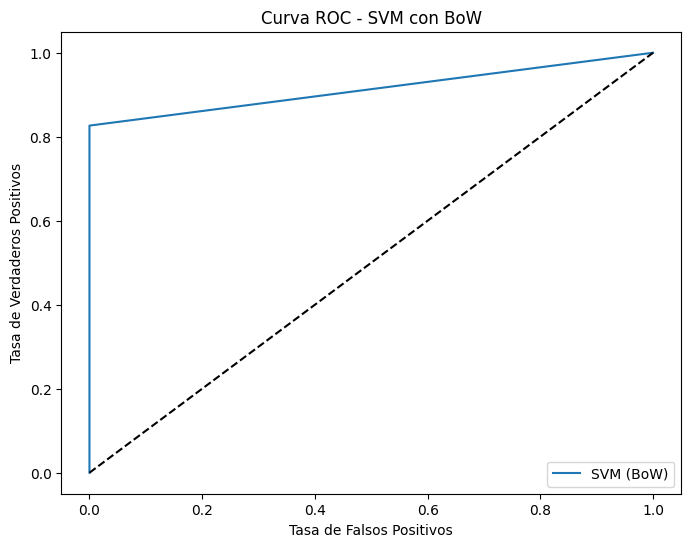

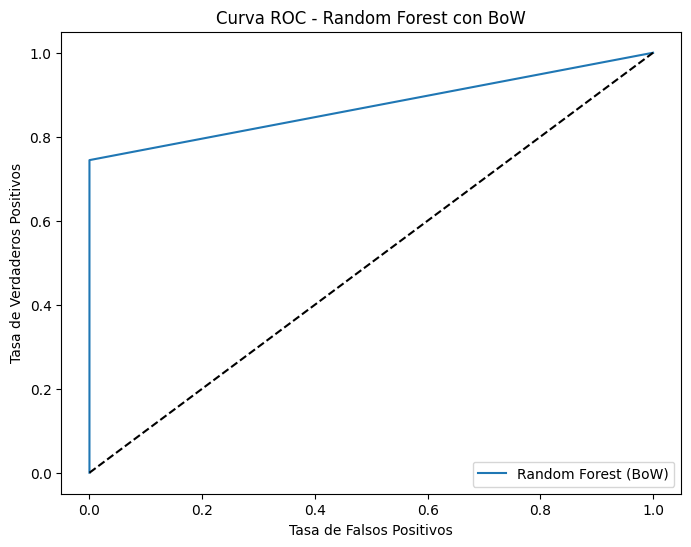

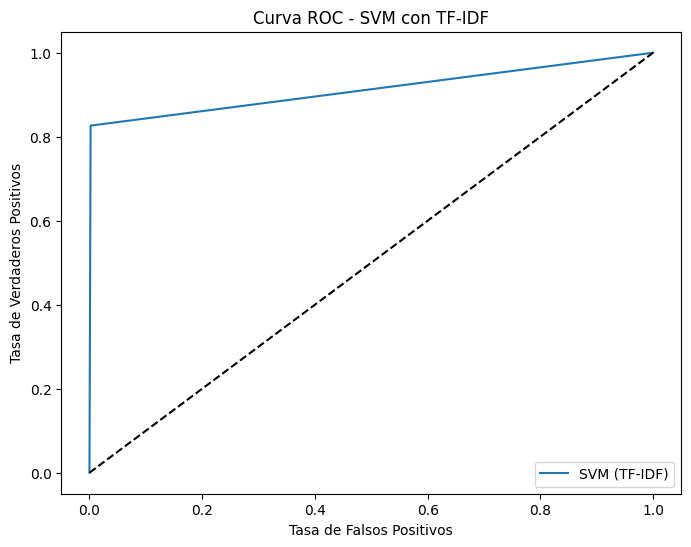

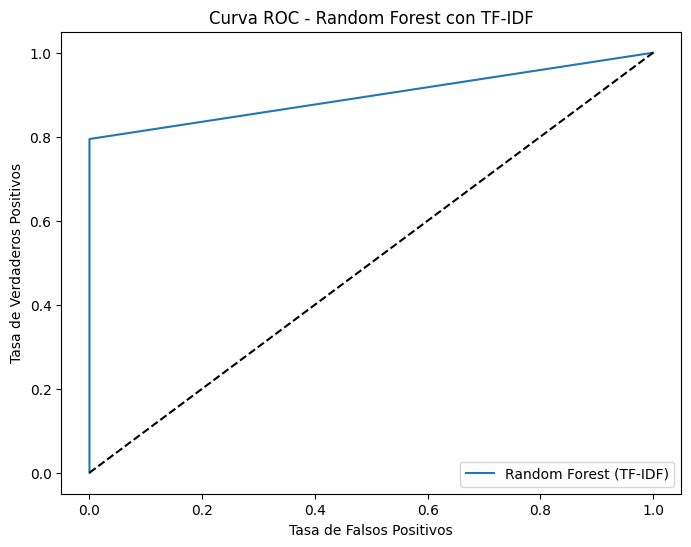

In [20]:
# Crear la curva ROC para SVM con BoW
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_bow, tpr_svm_bow, label='SVM (BoW)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - SVM con BoW')
plt.legend(loc='lower right')
plt.show()

# Crear la curva ROC para Random Forest con BoW
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_bow, tpr_rf_bow, label='Random Forest (BoW)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest con BoW')
plt.legend(loc='lower right')
plt.show()

# Crear la curva ROC para SVM con TF-IDF
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_tfidf, tpr_svm_tfidf, label='SVM (TF-IDF)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - SVM con TF-IDF')
plt.legend(loc='lower right')
plt.show()

# Crear la curva ROC para Random Forest con TF-IDF
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tfidf, tpr_rf_tfidf, label='Random Forest (TF-IDF)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest con TF-IDF')
plt.legend(loc='lower right')
plt.show()

### Parte 3 - Discusion

#### 1. ¿Qué error es más "aceptable": dejar pasar un SMS de SPAM (falso negativo) o bloquear un SMS legítimo (falso positivo)? Justificación.

El error más "aceptable" depende del contexto y las preferencias del usuario. En el caso de detección de spam en SMS, generalmente es preferible evitar los falsos positivos (bloquear un SMS legítimo) en lugar de los falsos negativos (dejar pasar un SMS de spam). Esto se debe a que un falso positivo puede resultar en la pérdida de comunicaciones importantes o en la interrupción de servicios legítimos, lo cual puede ser más perjudicial que recibir un SMS de spam ocasional. Sin embargo, en algunos casos, como en entornos de seguridad crítica, es posible que se prefiera minimizar los falsos negativos para garantizar una alta tasa de detección de spam, incluso a costa de algunos falsos positivos.

#### 2. Comparación de los valores para cada modelo de representación numérica.

| Modelo de Representación Numérica | Precision | Recall | AUC |
|-----------------------------------|-----------|--------|-----|
| BoW con SVM                       | 1.0       | 0.826  | 0.913 |
| BoW con Random Forest             | 1.0       | 0.744  | 0.872 |
| TF-IDF con SVM                    | 0.984     | 0.826  | 0.912 |
| TF-IDF con Random Forest          | 1.0       | 0.795  | 0.897 |

Según las métricas obtenidas y considerando la primera pregunta, BoW con SVM parece producir el mejor resultado en términos de una combinación de precisión, recall y AUC. Esto se debe a que tiene la mayor precisión y AUC entre todos los modelos, mientras mantiene un buen recall. El modelo SVM es eficiente en manejar características de alta dimensionalidad generadas por BoW, capaz de manejar datos no lineales y aplicar regularización efectiva para evitar el sobreajuste.

#### 3. Consejos para detectar si un email o SMS es phishing y características para detectar un potencial phishing.

Algunos consejos para detectar phishing:

- Verificar la autenticidad del remitente del mensaje.
- Revisar cuidadosamente los enlaces incluidos en el mensaje antes de hacer clic en ellos.
- No proporcionar información confidencial a través de mensajes no solicitados o enlaces sospechosos.
- Mantener actualizado el software de seguridad y utilizar herramientas de filtrado de correo electrónico y SMS.

Características de un potencial phishing:

- Enlaces sospechosos o maliciosos que redirigen a sitios web falsos.
- Errores gramaticales o de ortografía en el mensaje.
- Solicitudes de información confidencial o sensibilidad financiera.
- Mensajes de remitentes desconocidos o no confiables.

#### 4. Medidas para detener la distribución de un phishing detectado.

- Bloquear la dirección de correo electrónico o número de teléfono del remitente.
- Informar el mensaje sospechoso a proveedores de servicios de correo electrónico o SMS.
- Educar a los usuarios sobre cómo identificar y evitar mensajes de phishing.
- Actualizar y mantener las soluciones de seguridad para detectar y prevenir futuros intentos de phishing.